In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import matplotlib.pyplot as plt

In [3]:
BRK = wb.DataReader('BRK-A', data_source='google', start='1995-1-1')

In [4]:
BRK.head()

,Open,High,Low,Close,Volume
Date,,,,,
2001-06-28,68100.0,68600.0,67600.0,67900.0,300
2001-06-29,68100.0,69400.0,68100.0,69400.0,600
2001-07-02,69400.0,69400.0,68600.0,69100.0,500
2001-07-03,69000.0,69000.0,68700.0,68700.0,100
2001-07-05,68400.0,68800.0,68300.0,68600.0,100


In [5]:
BRK.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-05-17,244499.97,244680.0,242500.00,243110.0,471
2017-05-18,243000.00,244450.0,242180.00,242510.0,288
2017-05-19,243355.00,246220.0,242840.54,244910.0,254
2017-05-22,247499.90,248270.0,246200.50,247820.0,482
2017-05-23,248100.00,248690.0,247390.00,248121.0,327


# Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

*Adj Close* is "Adjusted close price", adjusted by dividends and other events at the close of the market at that date.

In [7]:
BRK['simple_return'] = (BRK['Close'] / BRK['Close'].shift(1)) - 1
print(BRK['simple_return'])

Date
2001-06-28         NaN
2001-06-29    0.022091
2001-07-02   -0.004323
2001-07-03   -0.005789
2001-07-05   -0.001456
2001-07-06    0.020408
2001-07-09    0.011429
2001-07-10   -0.005650
2001-07-11    0.000000
2001-07-12   -0.017045
2001-07-13   -0.001445
2001-07-16   -0.015919
2001-07-17    0.018382
2001-07-18   -0.003610
2001-07-19   -0.014493
2001-07-20    0.000000
2001-07-23    0.001471
2001-07-24   -0.001468
2001-07-25    0.002941
2001-07-26   -0.002933
2001-07-27    0.000000
2001-07-30   -0.005882
2001-07-31    0.023669
2001-08-01    0.004335
2001-08-02   -0.020144
2001-08-03    0.001468
2001-08-06    0.011730
2001-08-07   -0.004348
2001-08-08    0.002911
2001-08-09    0.013788
                ...   
2017-04-11   -0.007181
2017-04-12   -0.002699
2017-04-13   -0.011818
2017-04-17    0.006939
2017-04-18   -0.003851
2017-04-19   -0.006930
2017-04-20    0.012920
2017-04-21   -0.006675
2017-04-24    0.013439
2017-04-25    0.009568
2017-04-26    0.000478
2017-04-27   -0.005574
2017-0

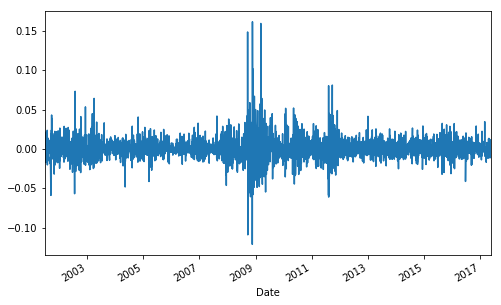

In [8]:
BRK['simple_return'].plot(figsize=(8,5))
plt.show()

In [12]:
avg_returns_d = BRK['simple_return'].mean()
avg_returns_d

0.00054959836826352199

In [13]:
avg_returns_a = avg_returns_d * 250 # multiply by the average number of business days per year
print(str(round(avg_returns_a, 5) * 100) + ' %')

13.74 %


# Logarithmic Return

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [14]:
BRK.head()

,Open,High,Low,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,20500.0,20550.0,20250.0,20400.0,27000,20400.0,NaN
1995-01-04,20400.0,20550.0,20350.0,20550.0,13000,20550.0,0.007353
1995-01-05,20500.0,20500.0,20500.0,20500.0,14000,20500.0,-0.002433
1995-01-06,20550.0,20600.0,20550.0,20600.0,4000,20600.0,0.004878
1995-01-09,20700.0,21200.0,20700.0,21200.0,21000,21200.0,0.029126


In [10]:
BRK['log_return'] = np.log(BRK['Close'] / BRK['Close'].shift(1))
print(BRK['log_return'])

Date
2001-06-28         NaN
2001-06-29    0.021851
2001-07-02   -0.004332
2001-07-03   -0.005806
2001-07-05   -0.001457
2001-07-06    0.020203
2001-07-09    0.011364
2001-07-10   -0.005666
2001-07-11    0.000000
2001-07-12   -0.017192
2001-07-13   -0.001446
2001-07-16   -0.016047
2001-07-17    0.018215
2001-07-18   -0.003617
2001-07-19   -0.014599
2001-07-20    0.000000
2001-07-23    0.001470
2001-07-24   -0.001470
2001-07-25    0.002937
2001-07-26   -0.002937
2001-07-27    0.000000
2001-07-30   -0.005900
2001-07-31    0.023393
2001-08-01    0.004326
2001-08-02   -0.020350
2001-08-03    0.001467
2001-08-06    0.011662
2001-08-07   -0.004357
2001-08-08    0.002907
2001-08-09    0.013694
                ...   
2017-04-11   -0.007206
2017-04-12   -0.002703
2017-04-13   -0.011888
2017-04-17    0.006915
2017-04-18   -0.003858
2017-04-19   -0.006954
2017-04-20    0.012837
2017-04-21   -0.006697
2017-04-24    0.013350
2017-04-25    0.009523
2017-04-26    0.000478
2017-04-27   -0.005589
2017-0

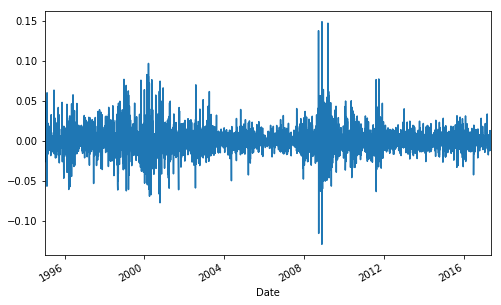

In [17]:
BRK['log_return'].plot(figsize=(8, 5))
plt.show()

In [18]:
log_return_d = BRK['log_return'].mean()
log_return_d

0.00044176628567140045

In [19]:
log_return_a = BRK['log_return'].mean() * 250
log_return_a

0.11044157141785012

In [21]:
print(str(round(log_return_a, 5) * 100) + ' %')

11.044 %
